# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

Board with 4 conflicts.


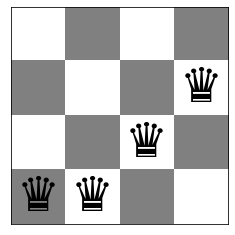

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

# TODO: REMOVE DEBUG CODE. IM TRYING TO UNDERSTAND THE ALGORITHM FOR DETERMINING CONFLICTS.
# TODO: REMOVE DEBUG CODE. IM TRYING TO UNDERSTAND THE ALGORITHM FOR DETERMINING CONFLICTS.
# TODO: REMOVE DEBUG CODE. IM TRYING TO UNDERSTAND THE ALGORITHM FOR DETERMINING CONFLICTS.
my_board = random_board(4)
curr_conflicts = conflicts(my_board)
show_board(my_board)

## Create a board

Board with 4 conflicts.


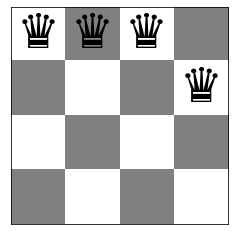

Queens (left to right) are at rows: [0 0 0 1]
Number of conflicts: 4


In [4]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


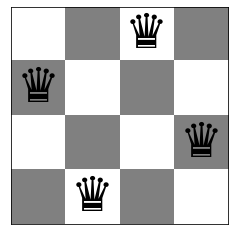

In [5]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

We implement the Steepest Ascent algorithm and verify its correctness on a board of size $4*4$.

The `Highest Value Successor` helper function determines a new location for a queen in a particular column such that the number of total pairwise conflicts (i.e. queens attacking each other) is minimized.

The `Steepest Ascent` function calls this helper function on each row of a given board, left to right, in order to find a local optima for a given n-queens board. It returns the board resulting from each of these local moves.

Board with 2 conflicts.


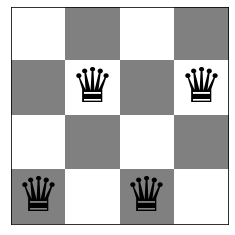

Now making local move at column 0 ...
Moving to row 3 ...
------------------------------------------
Board with 2 conflicts.


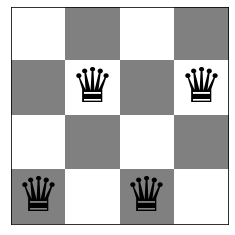

Now making local move at column 1 ...
Moving to row 0 ...
------------------------------------------
Board with 1 conflicts.


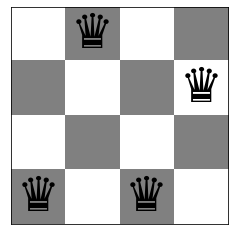

Now making local move at column 2 ...
Moving to row 3 ...
------------------------------------------
Board with 1 conflicts.


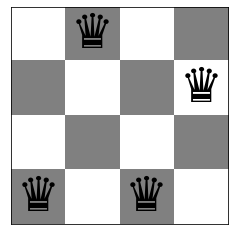

Now making local move at column 3 ...
Moving to row 1 ...
------------------------------------------
Board with 1 conflicts.


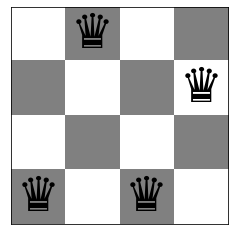

------------------FINAL------------------
Board with 1 conflicts.


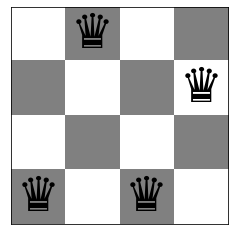

In [6]:
# Define the board. Using Board Size 4
BOARD_SIZE = 4

board = random_board(BOARD_SIZE)

############################################################
##                    HELPER FUNCTIONS                    ##
############################################################

def highest_value_successor(board, c):
    """! Determine the best local move (pairwise conflicts minimized) resulting from moving a queen in a board at column c.
    @param board    The board containing each queen's row location.
    @param C        The column in which we wish to make a local move.
    @return         The index of the local minimum by moving the queen in column c (i.e. where we placed the queen due to our local move).
    """

    curr_conflicts = conflicts(board)
    min_conflicts = curr_conflicts

    # At first -- Assume that the minimum is where the queen currently is
    min_idx = board[c]

    # Attempt to find a local move that BEST reduces the number of conflicts, and update the minimum index accordingly.
    for j in range(BOARD_SIZE):
        board[c] = j
        curr_conflicts = conflicts(board)
        if (curr_conflicts < min_conflicts):
            min_conflicts = curr_conflicts
            min_idx = j

    return min_idx
        
############################################################
##                    STEEPEST ASCENT                     ##
############################################################

def steepest_ascent(board, verbose=False):
    """! Implementation of the steepest ascent algorithm for the n_queens problem. Choose the best local move for each column from left to right.
    @param board    The board containing each queen's row location.
    @return         The placement of all the queens after running the algorithm.
    """
    
    # For each column, choose the highest-valued successor.
    for i in range(BOARD_SIZE):
        board[i] = highest_value_successor(board, i)
        
        if (verbose):
            print("Now making local move at column",i,"...")
            print("Moving to row",board[i],"...")
            print("------------------------------------------")
            show_board(board)

    return board

############################################################
##                      DRIVER CODE                       ##
############################################################

show_board(board)
board = steepest_ascent(board, verbose=True)
print("------------------FINAL------------------")
show_board(board)


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

We implement the Stochastic Ascent algorithm (Variation 1) and verify its correctness on a board of size $4*4$.

The `Random Uphill Move` helper function determines all possible locations for a queen in a particular column to move such that the number of total pairwise conflicts (i.e. queens attacking each other) is reduced. Then, the function selects one of those possible "uphill" moves at random.

The `Stochastic Ascent` (Variation 1) function calls this helper function on each row of a given board, left to right, in order to find a local optima for a given n-queens board. It returns the board resulting from each of these local moves.

Board with 5 conflicts.


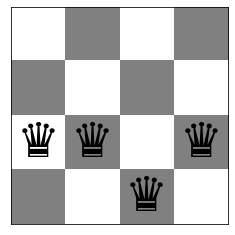

Now making local move at column 0 ...
Possible rows to move to : [0]
Moving to row 0 ...
------------------------------------------
Board with 3 conflicts.


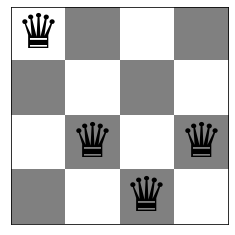

Now making local move at column 1 ...
Possible rows to move to : [1, 3]
Moving to row 3 ...
------------------------------------------
Board with 2 conflicts.


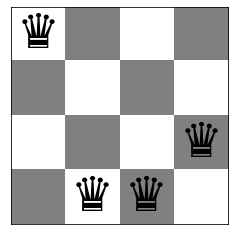

Now making local move at column 2 ...
Possible rows to move to : [0, 1]
Moving to row 1 ...
------------------------------------------
Board with 1 conflicts.


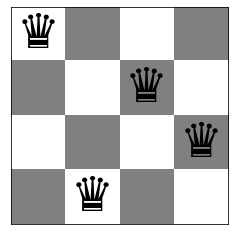

Now making local move at column 3 ...
No uphill moves. Keeping queen at original location
Moving to row 2 ...
------------------------------------------
Board with 1 conflicts.


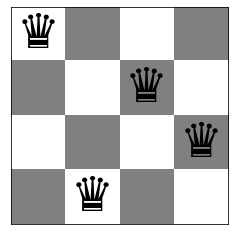

------------------FINAL------------------
Board with 1 conflicts.


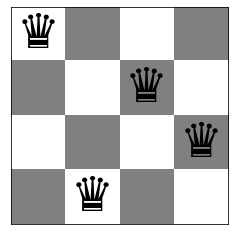

In [7]:
# Random functions used for stochastic implementation.
import random
random.seed()

# Define a new board. Still using Board Size 4
BOARD_SIZE = 4

board = random_board(BOARD_SIZE)

############################################################
##                    HELPER FUNCTIONS                    ##
############################################################

def random_uphill_move(board,c,verbose=False):
    """! Returns a random local move resulting from moving a queen in a board at column c that reduces the number of conflicts. It will not necessarily be the best option.
    @param board    The board containing each queen's row location.
    @param c        The column in which we wish to make a local move.
    @return         The index of the queen's new location due to the local move.
    """

    threshold = conflicts(board)
    curr_conflicts = threshold

    # In case no uphill moves are possible, store the original queen placement so we can return that instead.
    initial_row = board[c]

    # A list of ALL local moves that reduce the number of conflicts.
    uphill_moves = []

    # List ALL local moves that reduce the number of conflicts.
    for j in range(BOARD_SIZE):
        board[c] = j
        curr_conflicts = conflicts(board)
        if (curr_conflicts < threshold):
            uphill_moves.append(j)


    # Return a random uphill move if there is one. Otherwise, return the queen's original placement.
    if (len(uphill_moves) > 0):
        if (verbose): print("Possible rows to move to :",uphill_moves)
        return uphill_moves[random.randrange(0,len(uphill_moves))]
    else:
        if (verbose): print("No uphill moves. Keeping queen at original location")        
        return initial_row
     
############################################################
##                    STEEPEST ASCENT                     ##
############################################################

def stochastic_ascent(board, verbose=False):
    """! Implementation of the steepest ascent algorithm for the n_queens problem. Choose the best local move for each column from left to right.
    @param board    The board containing each queen's row location.
    @return         The placement of all the queens after running the algorithm.
    """
    
    # For each column, choose the highest-valued successor.
    for i in range(BOARD_SIZE):
        if (verbose): print("Now making local move at column",i,"...")
        board[i] = random_uphill_move(board, i, verbose)

        if (verbose):
            print("Moving to row",board[i],"...")
            print("------------------------------------------")
            show_board(board)

    return board

############################################################
##                      DRIVER CODE                       ##
############################################################

show_board(board)
board = stochastic_ascent(board, verbose=True)
print("------------------FINAL------------------")
show_board(board)


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

We implement the Stochastic Ascent algorithm (Variation 2) and verify its correctness on a board of size $4*4$.

The `Single Uphill Move` helper function selects ONE possible location for a queen in a particular column to move such that the number of total pairwise conflicts (i.e. queens attacking each other) is reduced. The function will return the first "uphill" move that it finds.

The `Stochastic Ascent` (Variation 2) function calls this helper function on each row of a given board, left to right, in order to find a local optima for a given n-queens board. It returns the board resulting from each of these local moves.

Board with 4 conflicts.


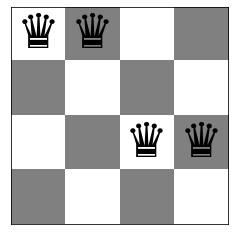

Now making local move at column 0 ...
Selected row 0 ...
Selected row 2 ...
Move was not uphill. Keeping queen at original location
Moving to row 0 ...
------------------------------------------
Board with 4 conflicts.


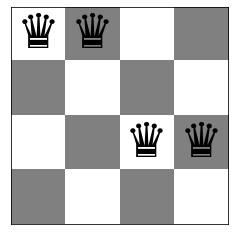

Now making local move at column 1 ...
Selected row 0 ...
Selected row 2 ...
Move was not uphill. Keeping queen at original location
Moving to row 0 ...
------------------------------------------
Board with 4 conflicts.


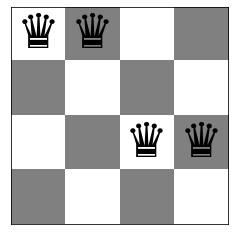

Now making local move at column 2 ...
Selected row 3 ...
Moving to row 3 ...
------------------------------------------
Board with 3 conflicts.


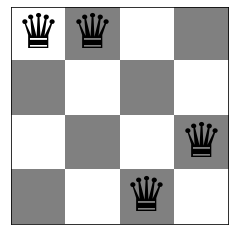

Now making local move at column 3 ...
Selected row 3 ...
Move was not uphill. Keeping queen at original location
Moving to row 2 ...
------------------------------------------
Board with 3 conflicts.


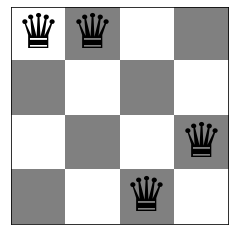

------------------FINAL------------------
Board with 3 conflicts.


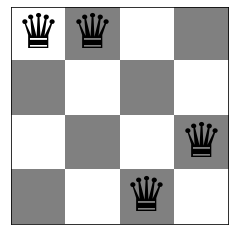

In [8]:
# Random functions used for stochastic implementation.
import random
random.seed()

# Define a new board. Still using Board Size 4
BOARD_SIZE = 4

board = random_board(BOARD_SIZE)

############################################################
##                    HELPER FUNCTIONS                    ##
############################################################

def single_uphill_move(board,c, verbose=False):
    """! Returns a SINGLE random local move resulting from moving a queen in a board at column c that reduces the number of conflicts. It will not necessarily be the best option.
    @param board    The board containing each queen's row location.
    @param c        The column in which we wish to make a local move.
    @return         The index of the queen's new location due to the local move.
    """

    threshold = conflicts(board)
    curr_conflicts = threshold

    # Store the initial location. If the single random successor has more conflicts, return the initial location.
    initial_row = board[c]

    # Choose one random move (that's not the same as initial_row). Return that move if it's an uphill move. Otherwise, return the queen's original placement.
    while board[c] == initial_row:
        board[c] = random.randrange(0,BOARD_SIZE)
        if(verbose): print("Selected row",board[c],"...")

    curr_conflicts = conflicts(board)
    if (curr_conflicts < threshold):
        return board[c]
    else:
        if (verbose): print("Move was not uphill. Keeping queen at original location")        
        return initial_row
     
############################################################
##                    STEEPEST ASCENT                     ##
############################################################

def stochastic_ascent_2(board, verbose=False):
    """! Implementation of the steepest ascent algorithm for the n_queens problem. Choose the best local move for each column from left to right.
    @param board    The board containing each queen's row location.
    @return         The placement of all the queens after running the algorithm.
    """
    
    # For each column, choose the highest-valued successor.
    for i in range(BOARD_SIZE):
        if (verbose): print("Now making local move at column",i,"...")
        board[i] = single_uphill_move(board, i,verbose)

        if (verbose):
            print("Moving to row",board[i],"...")
            print("------------------------------------------")
            show_board(board)

    return board

############################################################
##                      DRIVER CODE                       ##
############################################################

show_board(board)
board = stochastic_ascent_2(board, verbose=True)
print("------------------FINAL------------------")
show_board(board)


## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

We implement the Random Restart algorithm and verify its correctness on a board of size $4*4$.

The `Random Restart` algorithm implements `Steepest Ascent`, `Stochastic Ascent`, and `Stochastic Ascent 2`, running each on a random board, and accepting the board with the least number of pairwise conflicts after each is run. We repeat this 100 times, each with a random initial board (i.e. queens on each column placed at random positions), accepting a new final board iff the number of pairwise conflicts is less than the previous optimal board.

The goal of this algorithm is to hopefully "brute force" our way to a global optimum by randomly choosing an initial state and algorithm that is most favorable to avoiding local optima.

Board with 52 conflicts.


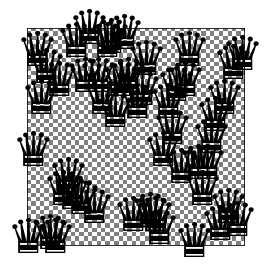

---------------- Iteration 0 ----------------
Initial conflicts this time: 51
Best this time: 1
New optimum: 1
---------------- Iteration 10 ----------------
Initial conflicts this time: 52
Best this time: 5
New optimum: 1
---------------- Iteration 20 ----------------
Initial conflicts this time: 60
Best this time: 3
New optimum: 1
---------------- Iteration 30 ----------------
Initial conflicts this time: 65
Best this time: 3
New optimum: 0
---------------- Iteration 40 ----------------
Initial conflicts this time: 59
Best this time: 5
New optimum: 0
---------------- Iteration 50 ----------------
Initial conflicts this time: 62
Best this time: 4
New optimum: 0
---------------- Iteration 60 ----------------
Initial conflicts this time: 49
Best this time: 5
New optimum: 0
---------------- Iteration 70 ----------------
Initial conflicts this time: 62
Best this time: 5
New optimum: 0
---------------- Iteration 80 ----------------
Initial conflicts this time: 44
Best this time: 2
New opti

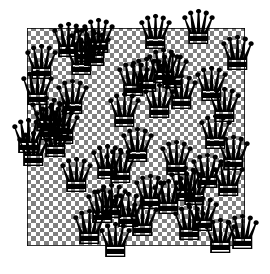

In [9]:
import sys

# Increase the board size to demonstrate the efficiency and variability of this approach.
BOARD_SIZE = 50
board = random_board(BOARD_SIZE)

############################################################
##                     RANDOM RESTART                     ##
############################################################

def random_restart(board, verbose = False):
    
    optimum = sys.maxsize
    optimal_board = random_board(BOARD_SIZE)

    # Repeat each algorithm 100 times.
    for x in range(100):

        # Each algorithm will be run on a random initial state. That random initial state will change each iteration.
        board = random_board(BOARD_SIZE)

        if (verbose and x % 10 == 0):
            print("---------------- Iteration",x,"----------------")
            print("Initial conflicts this time:",conflicts(board))

        results = {}
        # Run each algorithms, and store the conflicts of the resulting board.
        for algo in [steepest_ascent,stochastic_ascent,stochastic_ascent_2]:
            # Run each algorithm, and store the conflicts of the resulting board.
            curr_board = board
            results[algo.__name__] = (conflicts(algo(curr_board)),algo(curr_board))
            #results[conflicts(algo(curr_board))] = algo(curr_board)

        # Determine the new optimum and optimal board after this iteration.
        for algo_name in ["steepest_ascent","stochastic_ascent","stochastic_ascent_2"]:
            if (results[algo.__name__][0] < optimum):
                optimum = results[algo_name][0]
                optimal_board = results[algo_name][1]

        if (verbose and x % 10 == 0):
            print("Best this time:",min(results["steepest_ascent"][0],results["stochastic_ascent"][0],results["stochastic_ascent_2"][0]))
            print("New optimum:",optimum)

    return optimal_board

############################################################
##                      DRIVER CODE                       ##
############################################################

show_board(board)
board = random_restart(board, verbose=True)
print("------------------FINAL------------------")
show_board(board)

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

We run each algorithm on multiple different board sizes $n=[5,10,25,50]$, recording the average runtime and number of conflicts resulting from running each algorithm 10 times on the given board. Each iteration of running all four algorithms is done on a different random board of size $n*n$. 

Running Algorithms for Board Size 5 ...
Running Algorithms for Board Size 10 ...
Running Algorithms for Board Size 25 ...
Running Algorithms for Board Size 50 ...


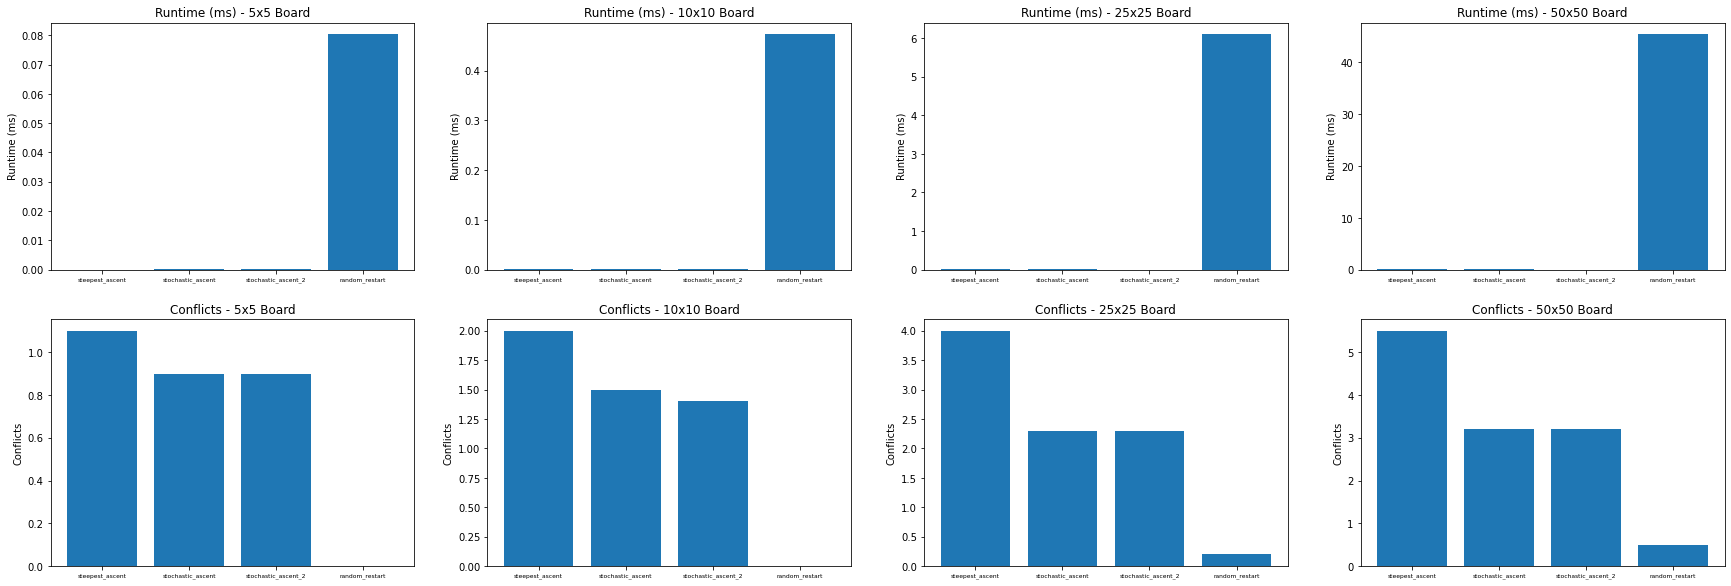

In [17]:
import matplotlib.pyplot as plt
import time

board_sizes = [5,10,25,50]
local_search_algos = [steepest_ascent,stochastic_ascent,stochastic_ascent_2,random_restart]
metrics_names = ["Runtime","Objective Function Value"]

NUM_BOARD_SIZES = len(board_sizes)
NUM_SEARCH_ALGOS = len(local_search_algos)
NUM_METRICS = len(metrics_names)

#           Size 5      Size 10     ...
# Runtime   (Algos)     (Algos)
# Obj.Fnc.
# 

fig, axs = plt.subplots(NUM_METRICS, NUM_BOARD_SIZES)
fig.set_size_inches(30,10)

for i in range(NUM_BOARD_SIZES):

    print("Running Algorithms for Board Size",board_sizes[i],"...")

    # Keep track of timing and number of conflicts for each algo.
    times = [0] * NUM_SEARCH_ALGOS
    num_conflicts = [0] * NUM_SEARCH_ALGOS

    # Run each algo on 10 different random boards.
    for x in range(10):

        # Create a random board for each algo to run on.
        BOARD_SIZE = board_sizes[i]
        board = random_board(BOARD_SIZE)
        boards = {}

        # Run each algo on the given board. Record time and conflicts for each.
        for j in range(NUM_SEARCH_ALGOS):
            curr_board = board
            t_i = time.time()
            boards[local_search_algos[j].__name__] = local_search_algos[j](curr_board)
            t_f = time.time()

            times[j] += t_f - t_i
            num_conflicts[j] += conflicts(boards[local_search_algos[j].__name__])

    # Divide each result by 10 to take average.
    for j in range(NUM_SEARCH_ALGOS):
        times[j] /= 10
        num_conflicts[j] /= 10

    # Plot the results.
    plt.rc('xtick',labelsize=6)

    axs[0,i].bar(boards.keys(), times)
    axs[0,i].set_title("Runtime (ms) - "+str(BOARD_SIZE)+"x"+str(BOARD_SIZE)+" Board")
    axs[0,i].set_ylabel("Runtime (ms)")

    axs[1,i].bar(boards.keys(), num_conflicts)
    axs[1,i].set_title("Conflicts - "+str(BOARD_SIZE)+"x"+str(BOARD_SIZE)+" Board")
    axs[1,i].set_ylabel("Conflicts")

Observations:

- Random Restart never averaged above 1 remaining conflict. Thus, in the case of all board sizes $<=50$, Random Restart is highly effective at finding the global optimum (0).
- Runtimes of Steepest Ascent, Stochastic Ascent, and Stochastic Ascent 2 are inconsequential in comparison to Random Restart. All four algorithms are $O(n)$ where $n$ is the side length of the n-queens board; however, Random Restart runs each algorithm 100 times. Since $100 > n$ for all $n <= 50$, random restart behaves closer to $O(n^2)$ for all purposes of this comparison. This is evident when noting how the runtime of Random Restart grows with board size -- doubling the side length more than quadruples the run time.
- Runtimes of Steepest Ascent, Stochastic Ascent, and Stochastic Ascent 2 are also inconsequential in comparison to each other. In the $5*5$ board, Steepest Ascent ran the quickest; however, in the $25*25$ board, Stochastic Ascent 2 ran the quickest.
- Random Restart on Board Size $100*100$ caused the code block above to take over 20 minutes to run. Therefore, for all intents and purposes of this project, Random Restart is best capped at $50*50$ for reasonable time performance.
- All other algorithms would likely be able to handle board sizes of over $1000*1000$ **as long as we constrain the n-queens problem to 1 queen per column**. Since these algorithms are in $O(n)$, we can expect a $500*500$ board to take less than 10 ms per iteration if a $50*50$ board takes less than 1ms per iteration.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [9]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [10]:
# Code and description go here